# ***Call tensorboard***

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/validation

# **Task 3 image classification**

In [1]:
import os,random,math,cv2
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from glob import glob
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from google.colab.patches import cv2_imshow
from scipy import stats
from sklearn.utils import resample
from tensorflow.keras.applications import EfficientNetB0
import seaborn as sns

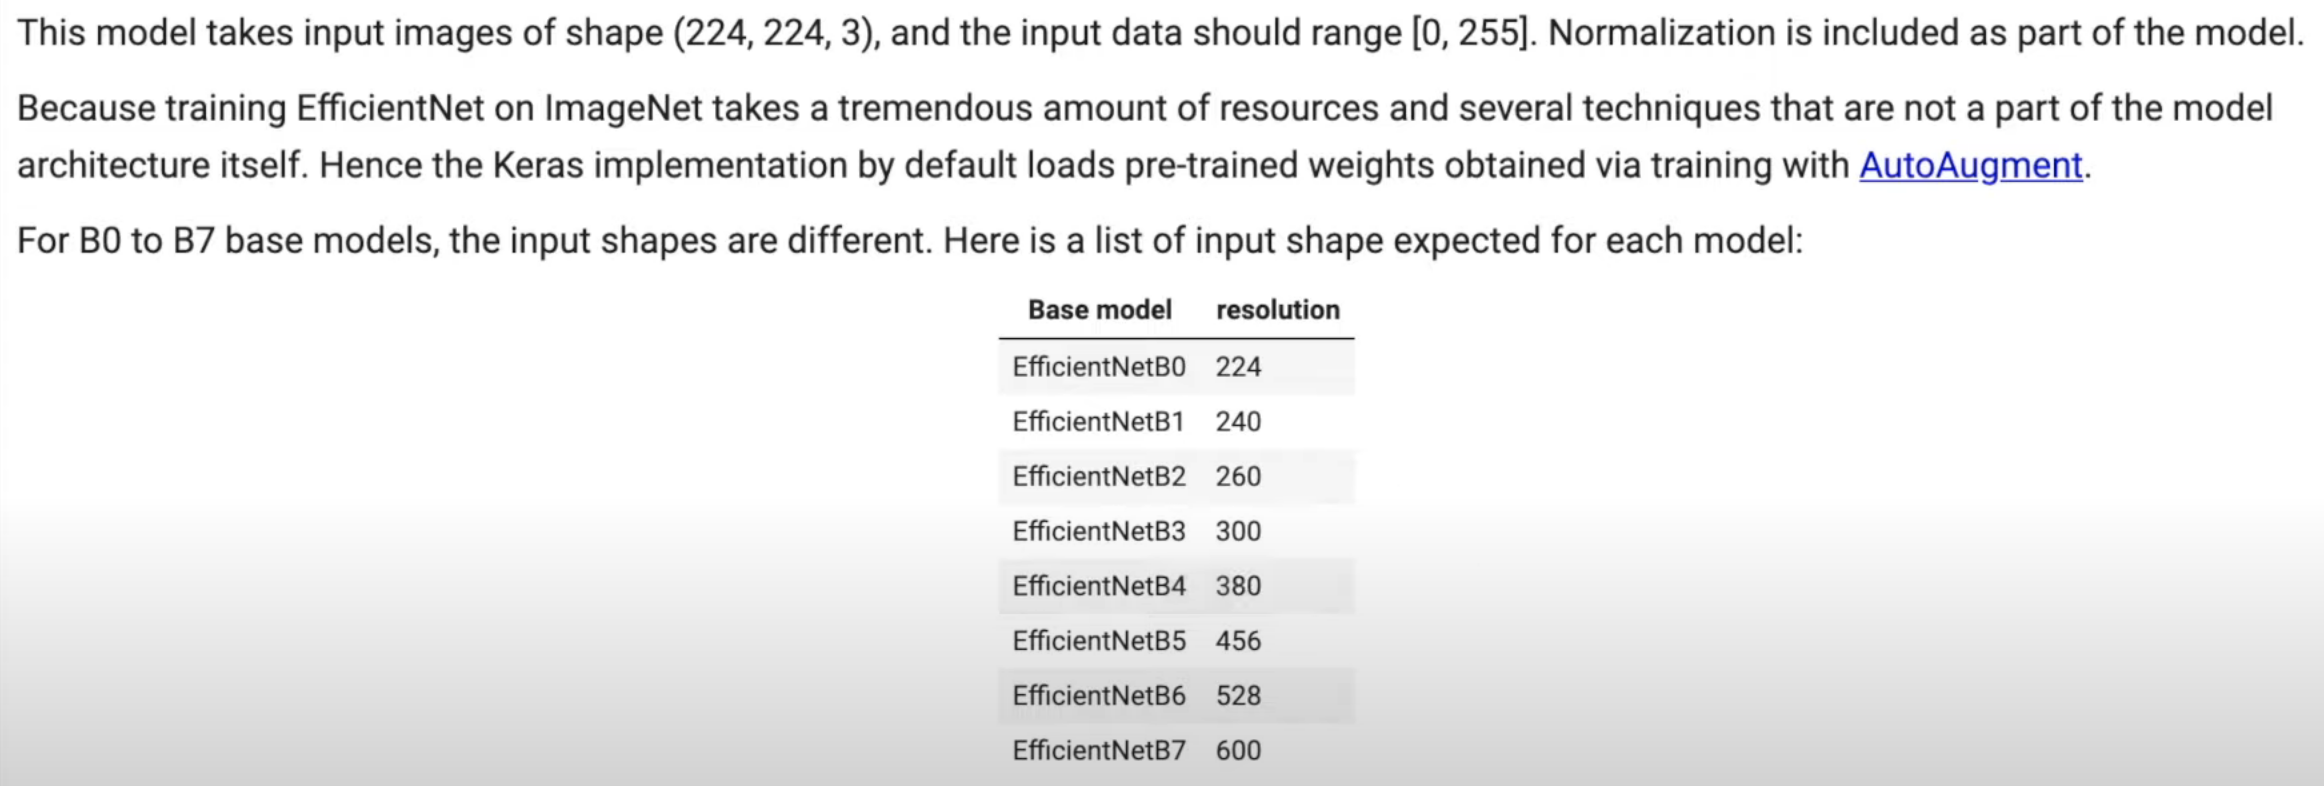

# **Preprocessing data**

In [ ]:
!pwd

/content


In [ ]:
import os
import shutil
import random,pandas as pd
import tqdm

In [ ]:
seed = 1
random.seed(seed)

train       = "Task3_train_test_val/train/"
test        = "Task3_train_test_val/test/"
validation  = "Task3_train_test_val/validation/"

os.makedirs(train + "MEL/")
os.makedirs(train + "NV/")
os.makedirs(train + "BCC/")
os.makedirs(train + "AKIEC/")
os.makedirs(train + "BKL/")
os.makedirs(train + "DF/")
os.makedirs(train + "VASC/")

os.makedirs(test + "MEL/")
os.makedirs(test + "NV/")
os.makedirs(test + "BCC/")
os.makedirs(test + "AKIEC/")
os.makedirs(test + "BKL/")
os.makedirs(test + "DF/")
os.makedirs(test + "VASC/")

os.makedirs(validation + "MEL/")
os.makedirs(validation + "NV/")
os.makedirs(validation + "BCC/")
os.makedirs(validation + "AKIEC/")
os.makedirs(validation + "BKL/")
os.makedirs(validation + "DF/")
os.makedirs(validation + "VASC/")



In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/ISIC2018/Dataset/Task23_gt/t3_val_gt/ISIC2018_Task3_Validation_GroundTruth.csv')
ds.shape[0]

193

In [ ]:
for line in open("/content/drive/MyDrive/ISIC2018/Dataset/Task23_gt/t3_train_gt/ISIC2018_Task3_Training_GroundTruth.csv").readlines()[95:100]:
    split_line = line.split(",")
    print(split_line)

['ISIC_0024400', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0\n']
['ISIC_0024401', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0\n']
['ISIC_0024402', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0\n']
['ISIC_0024403', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0\n']
['ISIC_0024404', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0\n']


In [ ]:
t3_train_image = '/content/drive/MyDrive/ISIC2018/Dataset/t3_train/train_t3/'
t3_val_image = '/content/drive/MyDrive/ISIC2018/Dataset/t3_val/val_t3/'
t3_test_image = '/content/drive/MyDrive/ISIC2018/Dataset/t3_test/test_t3/'
location = '/content/drive/MyDrive/ISIC2018/Dataset/Task3_train_test_val/'

In [ ]:
%cd /content/drive/MyDrive/ISIC2018/Dataset/Task3_train_test_val
!rm -rf validation/

/content/drive/MyDrive/ISIC2018/Dataset/Task3_train_test_val


In [ ]:
csv_path = '/content/drive/MyDrive/ISIC2018/Dataset/Task23_gt/t3_val_gt/ISIC2018_Task3_Validation_GroundTruth.csv'
_MEL = _NV = _BCC = _AKIEC = _BKL = _DF = _VASC = 0


for line in tqdm(open(csv_path).readlines()[1:],total=ds.shape[0]):
    split_line = line.split(",")
    img_file = split_line[0]

    MEL   = split_line[1]
    NV    = split_line[2]
    BCC   = split_line[3]
    AKIEC = split_line[4]
    BKL   = split_line[5]
    DF    = split_line[6]
    VASC  = split_line[7]

    if MEL=='1.0':
        shutil.copy(
            t3_val_image + img_file + ".jpg",
            location + "validation/MEL/" + img_file + ".jpg",
        )
        _MEL +=1
    elif NV=='1.0':
        shutil.copy(
            t3_val_image + img_file + ".jpg",
            location + "validation/NV/" + img_file + ".jpg",
        )
        _NV+=1
    elif BCC=='1.0':
        shutil.copy(
            t3_val_image + img_file + ".jpg",
            location + "validation/BCC/" + img_file + ".jpg",
        )
        _BCC+=1
    elif AKIEC=='1.0':
        shutil.copy(
            t3_val_image + img_file + ".jpg",
            location + "validation/AKIEC/" + img_file + ".jpg",
        )
        _AKIEC +=1
    elif BKL=='1.0':
        shutil.copy(
            t3_val_image + img_file + ".jpg",
            location + "validation/BKL/" + img_file + ".jpg",
        )
        _BKL+=1
    elif DF=='1.0':
        shutil.copy(
            t3_val_image + img_file + ".jpg",
            location + "validation/DF/" + img_file + ".jpg",
        )
        _DF+=1
    else:
        shutil.copy(
            t3_val_image + img_file + ".jpg",
            location + "validation/VASC/" + img_file + ".jpg",
        )
        _VASC+=1


print(f"\nNumber of MEL= {_MEL}")
print(f"Number of NV= {_NV}")
print(f"Number of BCC= {_BCC}")
print(f"Number of AKIEC= {_AKIEC}")
print(f"Number of BKL= {_BKL}")
print(f"Number of DF= {_DF}")
print(f"Number of VASC= {_VASC}")
print(_MEL+_NV+_BCC+_AKIEC+_BKL+_DF+_VASC)

In [ ]:
print(t3_val_image_ds.shape,t3_val_label.shape)

(193, 256, 256, 3) (193, 7)


# **Load numpy array data**

* NV    : Melanocytic nevi 痣
* MEL   : Melanoma 黑素瘤
* BKL   : Benign keratosis-like lesions 良性
* BCC   : Basal cell carcinoma 基底细胞癌
* AKIEC : Actinic keratoses 光化性角化病
* VAS   : Vascular lesions 血管损害
* DF    : Dermatofibroma 皮肤纤维瘤





# **Preprocessing csv file**

In [ ]:
"""load iamge np"""
#t3_train_image_np = np.load('/content/drive/MyDrive/ISIC2018/Dataset/image_cache/t3_train_images.npy')
t3_val_image_np   = np.load('/content/drive/MyDrive/ISIC2018/Dataset/image_cache/t3_validation_images.npy')
#t3_test_image_np  = np.load('/content/drive/MyDrive/ISIC2018/Dataset/image_cache/t3_test_images.npy')

#t3_train_image_ds = (np.array(t3_train_image_np)) / 255.
t3_val_image_ds   = (np.array(t3_val_image_np)) /255.
#t3_test_image_ds  = (np.array(t3_test_image_np)) / 255.

In [ ]:
t3_val_image_ds.shape

(193, 256, 256, 3)

In [ ]:
# get image id
t3_train_img_id = sorted(glob(os.path.join('/content/drive/MyDrive/ISIC2018/Dataset/t3_train/train_t3','*.jpg')))
t3_test_img_id = sorted(glob(os.path.join('/content/drive/MyDrive/ISIC2018/Dataset/t3_test/test_t3','*.jpg')))
t3_val_img_id = sorted(glob(os.path.join('/content/drive/MyDrive/ISIC2018/Dataset/t3_val/val_t3','*.jpg')))

In [ ]:
# Train Label
t3_train_gt = pd.read_csv('/content/drive/MyDrive/ISIC2018/Dataset/Task23_gt/t3_train_gt/ISIC2018_Task3_Training_GroundTruth.csv')
t3_val_gt = pd.read_csv('/content/drive/MyDrive/ISIC2018/Dataset/Task23_gt/t3_val_gt/ISIC2018_Task3_Validation_GroundTruth.csv')

In [ ]:
#drop first column
temp_train_gt = t3_train_gt.drop('image',axis=1).value_counts()
temp_train_gt

MEL  NV   BCC  AKIEC  BKL  DF   VASC
0.0  1.0  0.0  0.0    0.0  0.0  0.0     6705
1.0  0.0  0.0  0.0    0.0  0.0  0.0     1113
0.0  0.0  0.0  0.0    1.0  0.0  0.0     1099
          1.0  0.0    0.0  0.0  0.0      514
          0.0  1.0    0.0  0.0  0.0      327
               0.0    0.0  0.0  1.0      142
                           1.0  0.0      115
dtype: int64

In [ ]:
#drop first column
temp_val_gt = t3_val_gt.drop('image',axis=1).value_counts()
temp_val_gt

MEL  NV   BCC  AKIEC  BKL  DF   VASC
0.0  1.0  0.0  0.0    0.0  0.0  0.0     123
     0.0  0.0  0.0    1.0  0.0  0.0      22
1.0  0.0  0.0  0.0    0.0  0.0  0.0      21
0.0  0.0  1.0  0.0    0.0  0.0  0.0      15
          0.0  1.0    0.0  0.0  0.0       8
               0.0    0.0  0.0  1.0       3
                           1.0  0.0       1
dtype: int64

In [ ]:
#convert to numpy array
temp_train_gt = np.array(t3_train_gt.drop('image',axis=1)).astype(int)
print(temp_train_gt)
print('shape:',temp_train_gt.shape)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
shape: (10015, 7)


In [ ]:
#convert to numpy array
temp_val_gt = np.array(t3_val_gt.drop('image',axis=1)).astype(int)
print(temp_val_gt)
print('shape:',temp_val_gt.shape)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
shape: (193, 7)


In [ ]:
class_type = np.where(temp_val_gt[0]==1.0)[0][0]
class_type

1

# **Visualize images with type**

In [ ]:
class_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC']
plt.figure(figsize=(12,12))
x = random.randint(0,len(t3_val_gt)-17)
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(t3_val_img_id[x].split('/')[-1])
    plt.imshow(t3_val_image_np[x])
    plt.xlabel(class_names[np.where(temp_val_gt[x]==1.0)[0][0]])
    x += 1
plt.show()

NameError: ignored

<Figure size 864x864 with 0 Axes>

# **Prepare data generator**

In [ ]:
image_height, image_width = 256,256
batch_size = 32
train_dir = '/content/drive/MyDrive/ISIC2018/Dataset/Task3_train_test_val/train'
val_dir = '/content/drive/MyDrive/ISIC2018/Dataset/Task3_train_test_val/validation'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 10015 files belonging to 8 classes.
Using 8012 files for training.
Found 10015 files belonging to 8 classes.
Using 2003 files for validation.


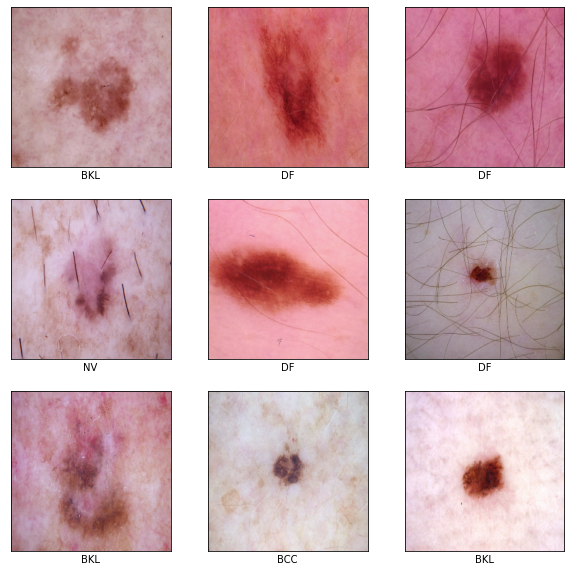

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.xlabel(class_names[labels[i]])
plt.show()

# **Labeling the images**

In [ ]:
#get the ground truth csv file
skin_df = pd.read_csv('/content/drive/MyDrive/ISIC2018/Dataset/Task23_gt/t3_train_gt/ISIC2018_Task3_Training_GroundTruth.csv')

#define class type
class_names = list(skin_df.drop('image',axis=1)[:0])

#drop the first column ('image')
skin_df = skin_df.drop('image',axis=1)

#convert type to int
temp = np.array(skin_df).astype('uint8')

#create a label array and assign label
label = []
for i in range(0, skin_df.shape[0]):
    label.append(np.where(temp[i]==1)[0][0])

#read the image ids only
df = pd.read_csv('/content/drive/MyDrive/ISIC2018/Dataset/Task23_gt/t3_train_gt/ISIC2018_Task3_Training_GroundTruth.csv', usecols=['image'])

#add the 'type' column
df["type"] = label

#save the new csv file
output_dir = '/content/drive/MyDrive/ISIC2018/Dataset/Task23_gt/t3_train_gt'
csv_name = 't3_train_label.csv'
df.to_csv(f"{output_dir}/{csv_name}", index=False)

# **Resample the imbalanced images**

In [ ]:
%cd /content/drive/MyDrive/ISIC2018/Dataset/Task3_train_test_val/train

/content/drive/MyDrive/ISIC2018/Dataset/Task3_train_test_val/train


In [2]:

skin_df = pd.read_csv('/content/drive/MyDrive/ISIC2018/Dataset/Task23_gt/t3_train_gt/t3_train_label.csv')
skin_df['type'].value_counts()

1    6705
0    1113
4    1099
2     514
3     327
6     142
5     115
Name: type, dtype: int64

In [3]:
SIZE = 32
skin_df = pd.read_csv('/content/drive/MyDrive/ISIC2018/Dataset/Task23_gt/t3_train_gt/t3_train_label.csv')
# skin_df['path'] = path

#seperate data frame
df_0 = skin_df[skin_df['type'] == 0]
df_1 = skin_df[skin_df['type'] == 1]
df_2 = skin_df[skin_df['type'] == 2]
df_3 = skin_df[skin_df['type'] == 3]
df_4 = skin_df[skin_df['type'] == 4]
df_5 = skin_df[skin_df['type'] == 5]
df_6 = skin_df[skin_df['type'] == 6]


In [4]:
"""resample"""
n_samples=500 
# n_samples=1000
# n_samples = 3000
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [ ]:
#Combined back to a single dataframe
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, df_2_balanced, 
                              df_3_balanced, df_4_balanced, df_5_balanced, 
                              df_6_balanced])
print(skin_df_balanced['type'].value_counts())

0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: type, dtype: int64


## **Open every image and create a Pixel column for the dataframe**

In [ ]:
# Dont' run this again!!!
image_path = {os.path.splitext(os.path.basename(x))[0]: 
        x for x in glob(os.path.join('/content/drive/MyDrive/ISIC2018/Dataset/Task3_train_test_val/train', '*', '*.jpg'))}
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image'].map(image_path.get)
#Use the path to read images. create pixel value column for images
skin_df_balanced['pix'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE)))) 

KeyboardInterrupt: ignored

#**Validation of balanced dataframe**

In [ ]:
n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, test.sort_values(['type']).groupby('type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['pix'])
        c_ax.axis('off')

NameError: ignored

#**create training and test dataset**

In [ ]:
#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['pix'].tolist())
#X = np.load('/content/drive/MyDrive/ISIC2018/Dataset/image_cache/t3_train_images.npy')

# Scale values to 0-1. You can also used standardscaler or other scaling methods.
X = X/255. 
Y=skin_df_balanced['type'] 

#Convert to categorical as this is a multiclass classification problem
Y_cat = to_categorical(Y, num_classes=7) 

#Split to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

#**Metrics**

In [ ]:
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

def sensitivity(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + K.epsilon())

#**create sequential model and compile**

In [ ]:
"""parameters——v2"""
num_classes = 7
batch_size = 32
epochs = 50
lr = 1e-4

"""step size"""
train_steps = len(x_train)//batch_size
valid_steps = len(x_test)//batch_size

"""output path"""
model_path = '/content/drive/MyDrive/ISIC2018/Models/task3_model/test_model_with_add_metrics.h5'
csv_path = '/content/drive/MyDrive/ISIC2018/Models/task3_model/test_model_with_add_metrics.csv'

"""Build the sequential model"""
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
# total 7 dense layer, have 7 outputs, take the highest probability as the class
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr), metrics=['acc',specificity,sensitivity,precision])
callbacks = [
                    ModelCheckpoint(filepath=model_path, verbose=1,save_best_only=True), 
                    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-8, verbose=1),
                    CSVLogger(csv_path),
                    TensorBoard(),
                    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False)
                ]

# **Training**

In [ ]:
history = model.fit(
                    x_train, y_train,
                    epochs=epochs,
                    batch_size = batch_size,
                    validation_data=(x_test, y_test),
                    steps_per_epoch = train_steps,
                    validation_steps = valid_steps,
                    callbacks = callbacks
                )

score = model.evaluate(x_test, y_test)
print('\nTest accuracy:', score[1])

In [ ]:
print('\nTest accuracy:', score[1])


Test accuracy: 0.6148571372032166


In [ ]:
"""Results"""
#loss
loss = history.history['loss']
val_loss = history.history['val_loss']
#specificity
specificity = history.history['specificity']
val_specificity = history.history['val_specificity']
#sensitivity
sensitivity = history.history['sensitivity']
val_sensitivity = history.history['val_sensitivity']
#precision
precision = history.history['precision']
val_precision = history.history['val_precision']
#acc
acc = history.history['acc']
val_acc = history.history['val_acc']

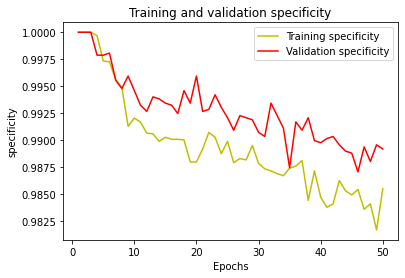

In [ ]:
specificity = history.history['specificity']
val_specificity = history.history['val_specificity']
epochs = range(1, len(specificity) + 1)
plt.plot(epochs, specificity, 'y', label='Training specificity')
plt.plot(epochs, val_specificity, 'r', label='Validation specificity')
plt.title('Training and validation specificity')
plt.xlabel('Epochs')
plt.ylabel('specificity')
plt.legend()
plt.show()

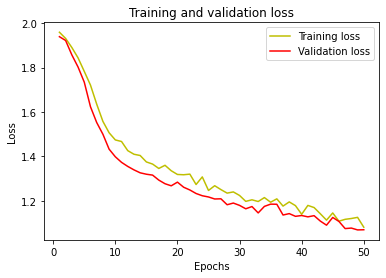

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


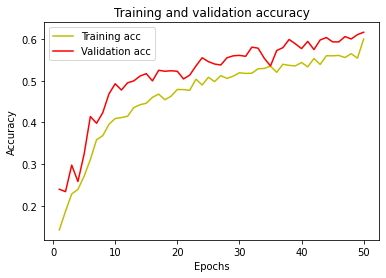

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_path='/content/drive/MyDrive/ISIC2018/Models/task3_model/test_model_with_add_metrics.h5'
model = tf.keras.models.load_model(model_path,
                                   custom_objects={'specificity': specificity, 'sensitivity': sensitivity, 'precision': precision}
                                   )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [ ]:
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

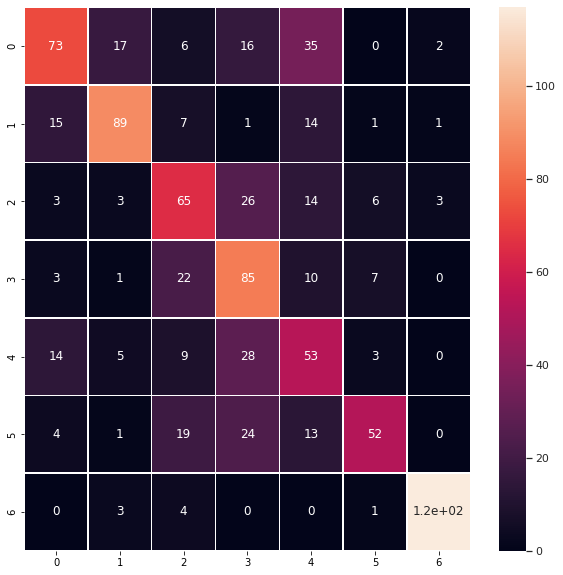

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, linewidths=0.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

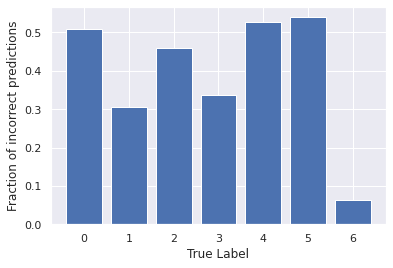

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')